In [1]:
import numpy
import control
import matplotlib.pyplot as plt
import Functions
%matplotlib inline

In [2]:
s = control.tf([1,0],1)
#For MIMO LTI defenition

num = [[[0.66], [-0.61], [-0.0049]],
       [[1.11], [-2.36], [-0.01]],
       [[-34.68], [46.2], [0.87*11.61, 0.87]]]

den = [[[6.7, 1], [8.64, 1], [9.06, 1]],
       [[3.25, 1], [5, 1], [7.09, 1]],
       [[8.15, 1], [10.9, 1], [3.89*18.8, 3.89+18.8, 1]]]

In [25]:
G11 = 0.66/(6.7*s + 1)
G12 = -0.61/(8.64*s + 1)
G13 = -0.0049/(9.06*s + 1)
G21 = 1.11/(3.25*s + 1)
G22 = -2.36/(5*s + 1)
G23 = -0.01/(7.09*s + 1)
G31 = -34.68/(8.15*s + 1)
G32 = 46.2/(10.9*s + 1)
G33 = 0.87*(11.61*s + 1)/((3.89*s + 1)*(18.8*s + 1))

G11d = Functions.Deadtime(G11, 2.6)
G12d = Functions.Deadtime(G12, 3.5)
G13d = Functions.Deadtime(G13, 1)
G21d = Functions.Deadtime(G21, 6.5)
G22d = Functions.Deadtime(G22, 3)
G23d = Functions.Deadtime(G23, 1.2)
G31d = Functions.Deadtime(G31, 9.2)
G32d = Functions.Deadtime(G32, 9.4)
G33d = Functions.Deadtime(G33, 1)
G11d.num[0][0]

array([ 0.5577, -0.858 ,  0.66  ])

In [26]:
Gd_num = [[G11d.num[0][0], G12d.num[0][0], G13d.num[0][0]],
          [G21d.num[0][0], G22d.num[0][0], G23d.num[0][0]],
          [G31d.num[0][0], G32d.num[0][0], G33d.num[0][0]]]
Gd_den = [[G11d.den[0][0], G12d.den[0][0], G13d.den[0][0]],
          [G21d.den[0][0], G22d.den[0][0], G23d.den[0][0]],
          [G31d.den[0][0], G32d.den[0][0], G33d.den[0][0]]]

In [53]:
G = control.tf(num, den)
G_dead = control.tf(Gd_num, Gd_den)

In [49]:
time = numpy.linspace(0,35,1000)
u = numpy.array([[1],[0],[0]])
t, y = control.step_response(T, time, input = 2)
td, yd = control.step_response(Td, time, input = 2)

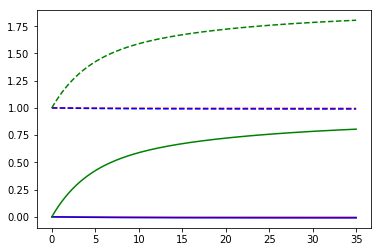

In [50]:
plt.plot(t, y[0,:], 'r--')
plt.plot(t, y[1,:], 'b--')
plt.plot(t, y[2,:], 'g--')

plt.plot(t, yd[0,:], 'r')
plt.plot(t, yd[1,:], 'b')
plt.plot(t, yd[2,:], 'g')

In [54]:
control.bode(G)

NotImplementedError: Bode is currently only implemented for SISO systems.

In [14]:
control.tf??